In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

data = yf.Ticker('BTC-USD').history(start='2000-01-04',end='2019-05-31')

data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.0,1718.0
mean,3078.142712,3167.467847,2982.019574,3082.683884,2.888944e+09,0.0,0.0
std,3626.875925,3760.539083,3466.573845,3628.540391,4.816836e+09,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,382.514496,390.967995,374.813751,382.628250,4.541000e+07,0.0,0.0
50%,935.685486,972.276978,919.642487,949.378998,1.808675e+08,0.0,0.0
75%,5550.955200,5639.983887,5396.964233,5567.854248,4.529831e+09,0.0,0.0
max,19475.800781,20089.000000,18974.099609,19497.400391,3.316720e+10,0.0,0.0


<AxesSubplot:xlabel='Close', ylabel='Count'>

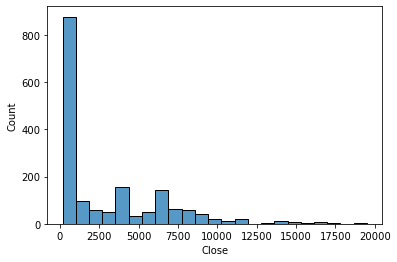

In [2]:
sns.histplot(data['Close'])

<AxesSubplot:ylabel='Count'>

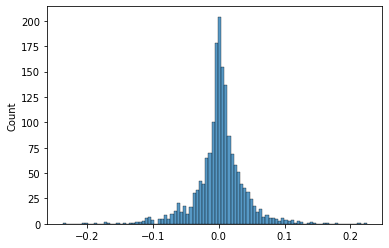

In [3]:
log_return = np.diff(np.log(data['Close']))
sns.histplot(log_return)

<AxesSubplot:xlabel='Close', ylabel='Count'>

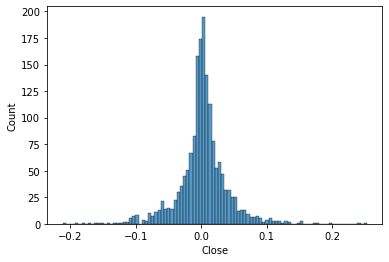

In [4]:
sns.histplot(data['Close'].pct_change())

<AxesSubplot:xlabel='Close', ylabel='Count'>

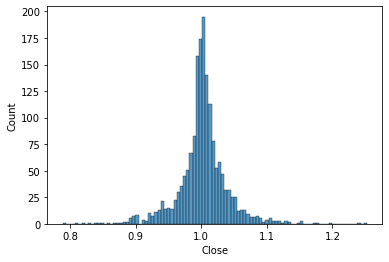

In [5]:
sns.histplot(data['Close']/data['Close'].shift())

In [6]:
data['Close'].pct_change()

Date
2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
                ...   
2019-05-27    0.015284
2019-05-28   -0.009745
2019-05-29   -0.006935
2019-05-30   -0.039265
2019-05-31    0.030655
Name: Close, Length: 1718, dtype: float64

In [7]:
np.exp(log_return)

array([0.92807442, 0.93015735, 1.03573492, ..., 0.99306481, 0.96073501,
       1.0306545 ])

In [8]:
data['Close']/data['Close'].shift()

Date
2014-09-17         NaN
2014-09-18    0.928074
2014-09-19    0.930157
2014-09-20    1.035735
2014-09-21    0.975341
                ...   
2019-05-27    1.015284
2019-05-28    0.990255
2019-05-29    0.993065
2019-05-30    0.960735
2019-05-31    1.030655
Name: Close, Length: 1718, dtype: float64

<AxesSubplot:ylabel='Count'>

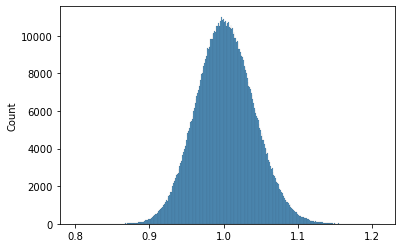

In [9]:
mu, std = stats.norm.fit(log_return)

random_return = np.random.normal(mu,std, 1000000)

sns.histplot(np.exp(random_return))

In [10]:
print(log_return.mean())
print(log_return.std())
print(mu,std)

0.0017071253227563385
0.038673804106056454
0.0017071253227563385 0.038673804106056454


0.0013772045184216085 0.05232835691147522


<AxesSubplot:ylabel='Count'>

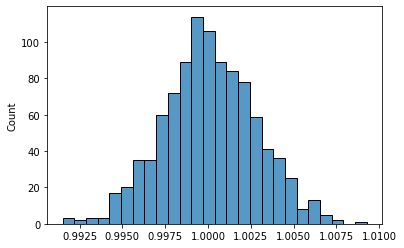

In [18]:

data = yf.Ticker('ETH-USD').history(period='max')

log_return = np.diff(np.log(data['Close']))
mean_return = log_return.mean()
volatility = log_return.std()
print(mean_return, volatility)
random_return = np.random.normal(
    (mean_return+1)**(1/365), volatility/np.sqrt(365), 1000)  # Generate random return

sns.histplot(random_return)

In [ ]:
random_return = np.random.normal(
    (mean_return)**(1/365), volatility/np.sqrt(365), 1000)  # Generate random return

sns.histplot(random_return)

C:\Users\G_MAN\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\G_MAN\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3

3 Simulation(s) Completed in 0 hour(s), 1 minute(s), and 3.85 second(s)
------------------------------------------------------------------------
Average Profit/Loss: $2,394.03
Profit/Loss Ranges from $0.00 - $7,182.09
Probability of Earning a Return = 33.33%
The VaR at 95% Confidence is: $0.00
------------------------------------------------------------------------


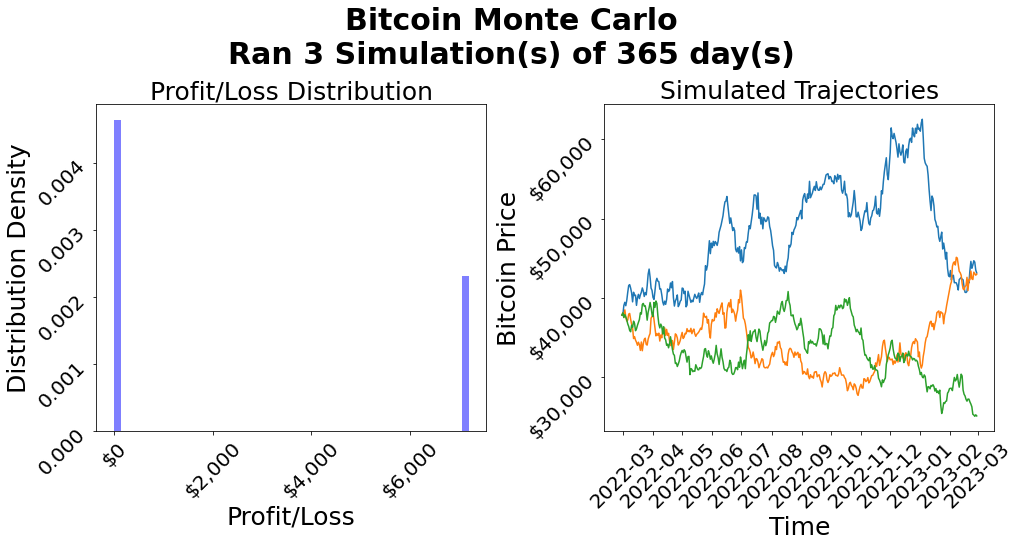

In [1]:
from Bitcoin_MonteCarlo import TimeSeries_MonteCarlo
import yfinance as yf

trading_days = 365
horizon = 365
rebuild_rate = 73
model = 'Options'
simulations = 3
options_info = dict(type='Asian', risk_free_rate=.03, strike='geometric', interval=4)

data = yf.Ticker('BTC-USD').history(period='max')
TS = TimeSeries_MonteCarlo(ts=data, model=model, horizon=horizon, trading_days=trading_days, rebuild_rate=rebuild_rate, options_info=options_info)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()